# <p style="background-color:#018cb7; font-family:tahoma; font-size:120%; text-align:left; color:#FFFFFF; padding: 15px 5px 15px 25px; border-radius: 15px;">Porto Seguro’s Safe Driver Prediction - Kaggle</p>

## Predict if a driver will file an insurance claim next year

<img src='./img/dont-be-that-guy-safe-driving-tips-for-all-ages-730x432.jpeg' style='height:400px; border-radius: 5px;'/>

---
# <p style="background-color:#018cb7; font-family:tahoma; font-size:120%; text-align:left; color:#FFFFFF; padding: 15px 5px 15px 25px; border-radius: 15px;">Contents:</p>

* [1. Introduction](#1)
    * [1.1 Data Dictionary](#1.1)
    * [1.2 Survey Questions](#1.2)
    * [1.3 International Standard Classification of Education (ISCED)](#1.3)
    * [1.4 Notebook settings](#1.4)
    * [1.5 Libraries](#1.5)
    * [1.6 Loading Dataset](#1.6)
* [2. Data Cleaning & Wrangling](#2)
    * [2.1 Handle Missings](#2.1)
    * [2.2 Data Transformation / Aggregation](#2.2)
    * [2.3 European Regions](#2.3)
* [4. Exploratory Data Analysis](#4)
    * [4.1 European Union Views](#4.1)
    * [4.2 Gender-Age Analysis](#4.2)
    * [4.3 Age Overview by Voting Intention](#4.3)
    * [4.4 Education Overview](#4.4)
    * [4.5 Unemployment rate](#4.5)
    * [4.6 Union Membership](#4.6)
* [5. Models](#5)
    * [5.1 Logistic Regression](#5.1)
    * [5.2 Predicted probability of voting to Leave the EU](#5.2)
* [6. Conclusion](#6)
* [7. References](#7)

<a id="1"></a>
# <p style="background-color:#018cb7; font-family:tahoma; font-size:120%; text-align:left; color:#FFFFFF; padding: 15px 5px 15px 25px; border-radius: 15px;">1- Introduction</p>

<img title="Porto Seguro" src="img/porto-seguro-logo-1.png" alt="Porto Seguro" style='height:100px; padding-left: 15px;' align="right"> In this competition, you will predict the probability that an auto insurance policy holder files a claim.

In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., `ind`, `reg`, `car`, `calc`). In addition, feature names include the postfix `bin` to indicate binary features and `cat` to indicate categorical features. Features without these designations are either continuous or ordinal. Values of `-1` indicate that the feature was missing from the observation. The `target` columns signifies whether or not a claim was filed for that policy holder. 

In [1]:
from platform import python_version
print('Python version used:', python_version())

Python version used: 3.8.5


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import random

%matplotlib inline
matplotlib.style.use("ggplot")

import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings
warnings.simplefilter('ignore', FutureWarning)

In [3]:
# !pip install -q -U watermark

In [4]:
%reload_ext watermark
%watermark -a "Leandro Pessini" --iversions

Author: Leandro Pessini

seaborn   : 0.11.1
plotly    : 4.14.3
numpy     : 1.19.2
pandas    : 1.1.3
matplotlib: 3.3.2



In [5]:
# Kaggle
#train_dataset = "../input/microsoft-malware-prediction/train.csv"

In [6]:
# Local
train_dataset = "./data/train.csv"

In [7]:
n = sum(1 for line in open(train_dataset)) - 1 #number of records in file (excludes header)
s = 10000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
train_df = pd.read_csv(train_dataset, skiprows=skip)

In [8]:
train_df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0001a2872a726ad4149c28df8542c074,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1094.0,0,7.0,0,NaN,49480.0,...,51032.0,0,NaN,0.0,0,0,0.0,0.0,4.0,0
1,0006a1a5232e0ec05e0112566b997d2d,win8defender,1.1.14800.3,4.9.10586.0,1.267.1375.0,0,7.0,0,NaN,61100.0,...,33026.0,1,0.0,0.0,1,0,0.0,0.0,11.0,1
2,0008fb850db8c428c13823e065d251c7,win8defender,1.1.15100.1,4.18.1807.18075,1.273.689.0,0,7.0,0,NaN,53447.0,...,11778.0,0,NaN,0.0,0,0,0.0,0.0,12.0,1
3,000910c213710c69d6380b164d1583aa,win8defender,1.1.14700.3,4.12.16299.15,1.263.859.0,0,7.0,0,NaN,53447.0,...,6895.0,1,NaN,0.0,0,0,0.0,0.0,1.0,1
4,000e35649ded78daf705a877286a1e52,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1707.0,0,7.0,0,NaN,49480.0,...,44277.0,0,NaN,0.0,0,0,0.0,0.0,11.0,1


In [9]:
print('Number of rows are',train_df.shape[0], 'and number of columns are ',train_df.shape[1])

Number of rows are 10000 and number of columns are  83


## Do we have an imbalanced class?

Yes:  5040
No:  4960


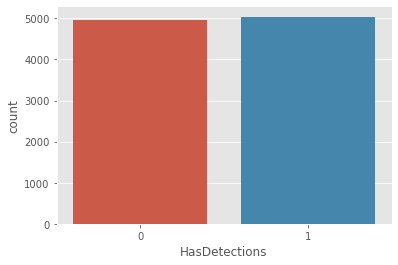

In [17]:
y = df_clean.HasDetections

ax = sns.countplot(y,label="Count")
Y, N = y.value_counts()
print('Yes: ',Y)
print('No: ',N)

---
We do not have class imbalance problem so no further transformation needed.

<a id="2"></a>
# <p style="font-size:120%; text-align:left; color:#636363;">2- Data Cleaning & Wrangling</p>

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 83 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   MachineIdentifier                                  10000 non-null  object 
 1   ProductName                                        10000 non-null  object 
 2   EngineVersion                                      10000 non-null  object 
 3   AppVersion                                         10000 non-null  object 
 4   AvSigVersion                                       10000 non-null  object 
 5   IsBeta                                             10000 non-null  int64  
 6   RtpStateBitfield                                   9970 non-null   float64
 7   IsSxsPassiveMode                                   10000 non-null  int64  
 8   DefaultBrowsersIdentifier                          496 non-null    float64
 9   AVProdu

There are a few variables with a high NULL values and we are setting 

In [12]:
# Drop columns with >= 80% of NaN values
df_clean = train_df.loc[:, train_df.isnull().mean() < .8]

# For non-Boolean data
# Total number of NaN entries in a column must be less than 80% of total entries:

# df = df.loc[:, df.isnull().sum() < 0.8*df.shape[0]]

Has Detections:  5040
No Detections :  4960


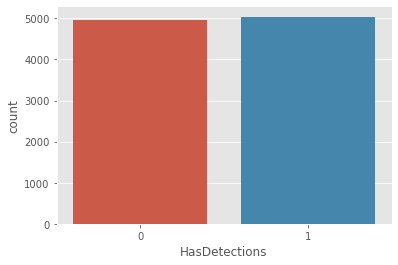

In [14]:
df_clean["ProductName"].unique()
Win8, mse = df_clean["ProductName"].value_counts()
print('win8defender: ',Win8)
print('mse : ',mse)

print('total : ',Win8+mse)

win8defender:  9894
mse :  106
total :  10000


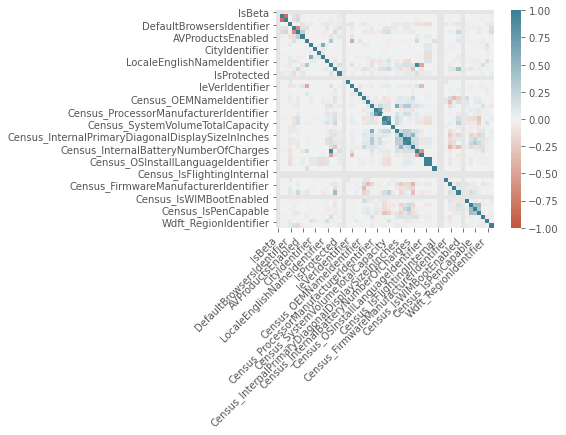

In [15]:
corr = train_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show()

## Description

The goal of this competition is to predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine. The telemetry data containing these properties and the machine infections was generated by combining heartbeat and threat reports collected by Microsoft's endpoint protection solution, Windows Defender.

Each row in this dataset corresponds to a machine, uniquely identified by a MachineIdentifier. HasDetections is the ground truth and indicates that Malware was detected on the machine. Using the information and labels in train.csv, you must predict the value for HasDetections for each machine in test.csv.

The sampling methodology used to create this dataset was designed to meet certain business constraints, both in regards to user privacy as well as the time period during which the machine was running. Malware detection is inherently a time-series problem, but it is made complicated by the introduction of new machines, machines that come online and offline, machines that receive patches, machines that receive new operating systems, etc. While the dataset provided here has been roughly split by time, the complications and sampling requirements mentioned above may mean you may see imperfect agreement between your cross validation, public, and private scores! Additionally, this dataset is not representative of Microsoft customers’ machines in the wild; it has been sampled to include a much larger proportion of malware machines.

Columns
Unavailable or self-documenting column names are marked with an "NA".

- MachineIdentifier - Individual machine ID
- ProductName - Defender state information e.g. win8defender
- EngineVersion - Defender state information e.g. 1.1.12603.0
- AppVersion - Defender state information e.g. 4.9.10586.0
- AvSigVersion - Defender state information e.g. 1.217.1014.0
- IsBeta - Defender state information e.g. false
- RtpStateBitfield - NA
- IsSxsPassiveMode - NA
- DefaultBrowsersIdentifier - ID for the machine's default browser
- AVProductStatesIdentifier - ID for the specific configuration of a user's antivirus software
- AVProductsInstalled - NA
- AVProductsEnabled - NA
- HasTpm - True if machine has tpm
- CountryIdentifier - ID for the country the machine is located in
- CityIdentifier - ID for the city the machine is located in
- OrganizationIdentifier - ID for the organization the machine belongs in, organization ID is mapped to both specific companies and broad industries
- GeoNameIdentifier - ID for the geographic region a machine is located in
- LocaleEnglishNameIdentifier - English name of Locale ID of the current user
- Platform - Calculates platform name (of OS related properties and processor property)
- Processor - This is the process architecture of the installed operating system
- OsVer - Version of the current operating system
- OsBuild - Build of the current operating system
- OsSuite - Product suite mask for the current operating system.
- OsPlatformSubRelease - Returns the OS Platform sub-release (Windows Vista, Windows 7, Windows 8, TH1, TH2)
- OsBuildLab - Build lab that generated the current OS. Example: 9600.17630.amd64fre.winblue_r7.150109-2022
- SkuEdition - The goal of this feature is to use the Product Type defined in the MSDN to map to a 'SKU-Edition' name that is useful in population reporting. The valid Product Type are defined in %sdxroot%\data\windowseditions.xml. This API has been used since Vista and Server 2008, so there are many Product Types that do not apply to Windows 10. The 'SKU-Edition' is a string value that is in one of three classes of results. The design must hand each class.
- IsProtected - This is a calculated field derived from the Spynet Report's AV Products field. Returns: a. TRUE if there is at least one active and up-to-date antivirus product running on this machine. b. FALSE if there is no active AV product on this machine, or if the AV is active, but is not receiving the latest updates. c. null if there are no Anti Virus Products in the report. Returns: Whether a machine is protected.
- AutoSampleOptIn - This is the SubmitSamplesConsent value passed in from the service, available on CAMP 9+
- PuaMode - Pua Enabled mode from the service
- SMode - This field is set to true when the device is known to be in 'S Mode', as in, Windows 10 S mode, where only Microsoft Store apps can be installed
- IeVerIdentifier - NA
- SmartScreen - This is the SmartScreen enabled string value from registry. This is obtained by checking in order, HKLM\SOFTWARE\Policies\Microsoft\Windows\System\SmartScreenEnabled and HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Explorer\SmartScreenEnabled. If the value exists but is blank, the value "ExistsNotSet" is sent in telemetry.
- Firewall - This attribute is true (1) for Windows 8.1 and above if windows firewall is enabled, as reported by the service.
- UacLuaenable - This attribute reports whether or not the "administrator in Admin Approval Mode" user type is disabled or enabled in UAC. The value reported is obtained by reading the regkey HKLM\SOFTWARE\Microsoft\Windows\CurrentVersion\Policies\System\EnableLUA.
- Census_MDC2FormFactor - A grouping based on a combination of Device Census level hardware characteristics. The logic used to define Form Factor is rooted in business and industry standards and aligns with how people think about their device. (Examples: Smartphone, Small Tablet, All in One, Convertible...)
- Census_DeviceFamily - AKA DeviceClass. Indicates the type of device that an edition of the OS is intended for. Example values: Windows.Desktop, Windows.Mobile, and iOS.Phone
- Census_OEMNameIdentifier - NA
- Census_OEMModelIdentifier - NA
- Census_ProcessorCoreCount - Number of logical cores in the processor
- Census_ProcessorManufacturerIdentifier - NA
- Census_ProcessorModelIdentifier - NA
- Census_ProcessorClass - A classification of processors into high/medium/low. Initially used for Pricing Level SKU. No longer maintained and updated
- Census_PrimaryDiskTotalCapacity - Amount of disk space on primary disk of the machine in MB
- Census_PrimaryDiskTypeName - Friendly name of Primary Disk Type - HDD or SSD
- Census_SystemVolumeTotalCapacity - The size of the partition that the System volume is installed on in MB
- Census_HasOpticalDiskDrive - True indicates that the machine has an optical disk drive (CD/DVD)
- Census_TotalPhysicalRAM - Retrieves the physical RAM in MB
- Census_ChassisTypeName - Retrieves a numeric representation of what type of chassis the machine has. A value of 0 means xx
- Census_InternalPrimaryDiagonalDisplaySizeInInches - Retrieves the physical diagonal length in inches of the primary display
- Census_InternalPrimaryDisplayResolutionHorizontal - Retrieves the number of pixels in the horizontal direction of the internal display.
- Census_InternalPrimaryDisplayResolutionVertical - Retrieves the number of pixels in the vertical direction of the internal display
- Census_PowerPlatformRoleName - Indicates the OEM preferred power management profile. This value helps identify the basic form factor of the device
- Census_InternalBatteryType - NA
- Census_InternalBatteryNumberOfCharges - NA
- Census_OSVersion - Numeric OS version Example - 10.0.10130.0
- Census_OSArchitecture - Architecture on which the OS is based. Derived from OSVersionFull. Example - amd64
- Census_OSBranch - Branch of the OS extracted from the OsVersionFull. Example - OsBranch = fbl_partner_eeap where OsVersion = 6.4.9813.0.amd64fre.fbl_partner_eeap.140810-0005
- Census_OSBuildNumber - OS Build number extracted from the OsVersionFull. Example - OsBuildNumber = 10512 or 10240
- Census_OSBuildRevision - OS Build revision extracted from the OsVersionFull. Example - OsBuildRevision = 1000 or 16458
- Census_OSEdition - Edition of the current OS. Sourced from HKLM\Software\Microsoft\Windows NT\CurrentVersion@EditionID in registry. Example: Enterprise
- Census_OSSkuName - OS edition friendly name (currently Windows only)
- Census_OSInstallTypeName - Friendly description of what install was used on the machine i.e. clean
- Census_OSInstallLanguageIdentifier - NA
- Census_OSUILocaleIdentifier - NA
- Census_OSWUAutoUpdateOptionsName - Friendly name of the WindowsUpdate auto-update settings on the machine.
- Census_IsPortableOperatingSystem - Indicates whether OS is booted up and running via Windows-To-Go on a USB stick.
- Census_GenuineStateName - Friendly name of OSGenuineStateID. 0 = Genuine
- Census_ActivationChannel - Retail license key or Volume license key for a machine.
- Census_IsFlightingInternal - NA
- Census_IsFlightsDisabled - Indicates if the machine is participating in flighting.
- Census_FlightRing - The ring that the device user would like to receive flights for. This might be different from the ring of the OS which is currently installed if the user changes the ring after getting a flight from a different ring.
- Census_ThresholdOptIn - NA
- Census_FirmwareManufacturerIdentifier - NA
- Census_FirmwareVersionIdentifier - NA
- Census_IsSecureBootEnabled - Indicates if Secure Boot mode is enabled.
- Census_IsWIMBootEnabled - NA
- Census_IsVirtualDevice - Identifies a Virtual Machine (machine learning model)
- Census_IsTouchEnabled - Is this a touch device ?
- Census_IsPenCapable - Is the device capable of pen input ?
- Census_IsAlwaysOnAlwaysConnectedCapable - Retreives information about whether the battery enables the device to be AlwaysOnAlwaysConnected .
- Wdft_IsGamer - Indicates whether the device is a gamer device or not based on its hardware combination.
- Wdft_RegionIdentifier - NA